<a href="https://colab.research.google.com/github/RavipatiRamya2023/MACHINE-LEARNING/blob/main/exp_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


KMeans Accuracy: 1.0
GMM (EM) Accuracy: 1.0

KMeans Confusion Matrix:
[[6 0]
 [0 3]]

GMM Confusion Matrix:
[[6 0]
 [0 3]]

Silhouette Score (KMeans): 0.23790299846817906
Silhouette Score (GMM): 0.23790299846817906


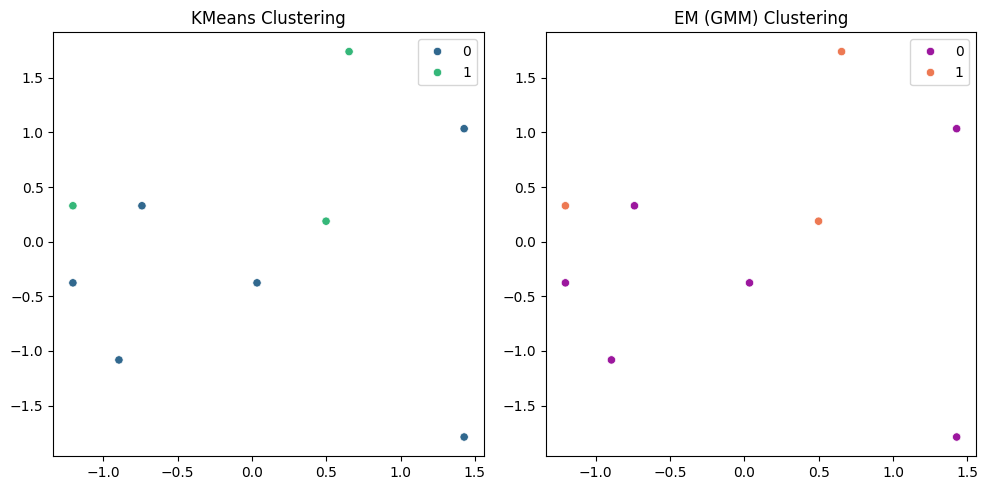

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv("/content/heart.csv")

# Step 2: Preprocessing
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']  # ground truth for evaluation

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X,
                  columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'],  # List your categorical columns here
                  drop_first=True)  # Optional: drop the first category to avoid multicollinearity

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Step 4: Apply EM Algorithm (Gaussian Mixture Model)
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# Step 5: Adjust labels (since cluster labels can be reversed)
def fix_labels(true_labels, cluster_labels):
    from sklearn.metrics import accuracy_score
    if accuracy_score(true_labels, cluster_labels) < 0.5:
        return [1 - label for label in cluster_labels]
    return cluster_labels

kmeans_labels = fix_labels(y, kmeans_labels)
gmm_labels = fix_labels(y, gmm_labels)

# Step 6: Evaluate
print("\nKMeans Accuracy:", accuracy_score(y, kmeans_labels))
print("GMM (EM) Accuracy:", accuracy_score(y, gmm_labels))

print("\nKMeans Confusion Matrix:")
print(confusion_matrix(y, kmeans_labels))

print("\nGMM Confusion Matrix:")
print(confusion_matrix(y, gmm_labels))

print("\nSilhouette Score (KMeans):", silhouette_score(X_scaled, kmeans_labels))
print("Silhouette Score (GMM):", silhouette_score(X_scaled, gmm_labels))

# Optional: Plot clusters (You might need to adjust the columns used for plotting)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
# Assuming the first two columns of X_scaled are relevant for plotting
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette="viridis")
plt.title("KMeans Clustering")

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=gmm_labels, palette="plasma")
plt.title("EM (GMM) Clustering")
plt.tight_layout()
plt.show()